In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


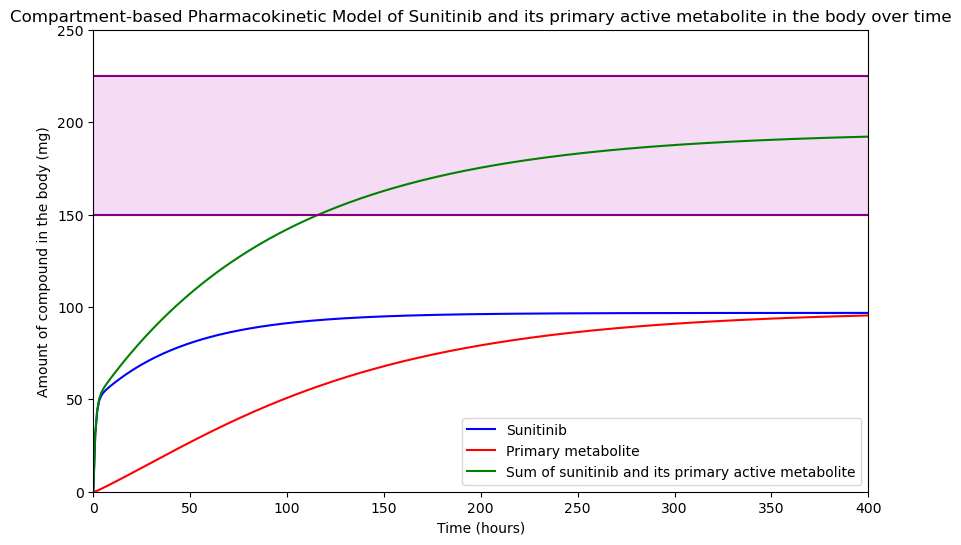

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

a = 0
b = 400
n = 400
 
t = np.linspace(a, b, n)

def compartment(y, t, hourly_dose, clearance_s, clearace_m, absorption, metabolism, distribution_s, distribution_m): #model describing the flows between compartments
    GI, S, M = y #define the parameters to be the vector that is given at the start of the function, so each can be initialized at a determined value
    dGIdt = hourly_dose - absorption * GI #the hourly dose - the amount absorbed
    dSdt = absorption * GI - clearance_s * S / distribution_s #The amount absorbned - the rate of clearance (metabolism included in clearance rate in the literature)
    dMdt = metabolism * S - clearance_m * M / distribution_m #The amount of the drug that is metabolized - the clearance rate of the metabolite
    
    return [dGIdt, dSdt, dMdt]
#Define all parameters used in the model
clearance_s = 48  #L/hr 
clearance_m =  29.6 #L/hr
hourly_dose = 2.083 #mg/hour
metabolism = 0.01 #This was interpolated
absorption = 0.95 #Since bioavailability ~ 95%, we can asssume absorption percentage to be similar, they are not equal, but equivalent given the simplicity of this model
distribution_s = 2230 #L
distribution_m = 3000 #L
y0 = [50, 0, 0]

protosolution = odeint(compartment, y0, t, args=(hourly_dose, clearance_s, clearance_m, absorption, metabolism, distribution_s, distribution_m))
GI, S, M = protosolution.T  # Extracting the first column from the solution array

plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', label='Sunitinib') #Plot the solved differential equation
plt.plot(t, M, 'r', label = 'Primary metabolite') #Plot the solved differential equation
plt.plot(t, S+M, 'g', label = 'Sum of sunitinib and its primary active metabolite') #Plot the sums of 
plt.title('Compartment-based Pharmacokinetic Model of Sunitinib and its primary active metabolite in the body over time') #Both the drug and it's primary metabolite are pharmaceutically active, so the sum of their amounts is whats important
plt.axhline(y = 225, color = 'purple', linestyle = '-')
plt.axhline(y = 150, color = 'purple', linestyle = '-')
plt.xlabel('Time (hours)')
ax = plt.gca()
ax.set_xlim([0,400])
ax.set_ylim([0, 250])
plt.fill_between(t, 150,225, color = 'orchid', alpha = 0.25)
plt.ylabel('Amount of compound in the body (mg)')
plt.legend()
plt.grid(False)
plt.show()

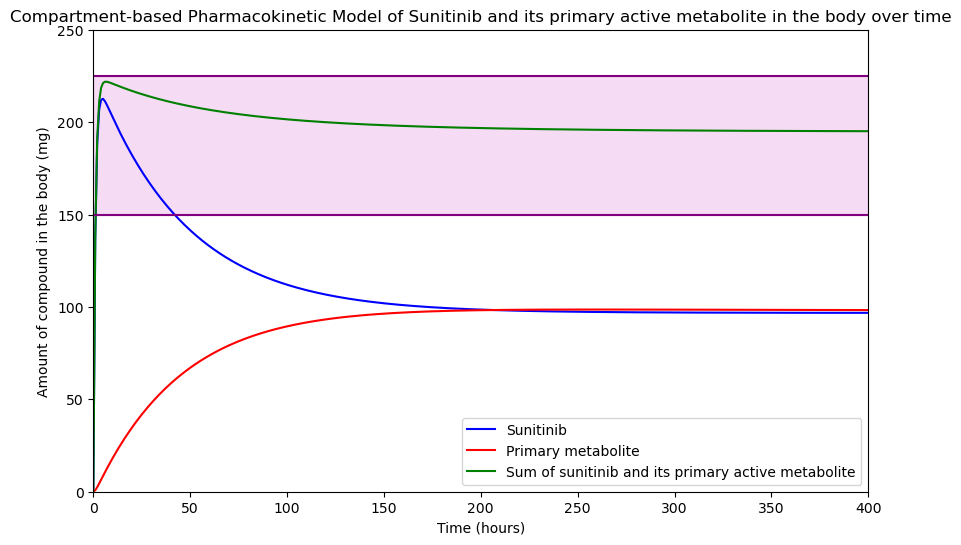

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

a = 0
b = 400
n = 400
 
t = np.linspace(a, b, n)

def compartment(y, t, hourly_dose, clearance_s, clearace_m, absorption, metabolism, distribution_s, distribution_m): #model describing the flows between compartments
    GI, S, M = y #define the parameters to be the vector that is given at the start of the function, so each can be initialized at a determined value
    dGIdt = hourly_dose - absorption * GI #the hourly dose - the amount absorbed
    dSdt = absorption * GI - clearance_s * S / distribution_s #The amount absorbned - the rate of clearance (metabolism included in clearance rate in the literature)
    dMdt = metabolism * S - clearance_m * M / distribution_m #The amount of the drug that is metabolized - the clearance rate of the metabolite
    
    return [dGIdt, dSdt, dMdt]
#Define all parameters used in the model
clearance_s = 48  #L/hr 
clearance_m =  29.6 #L/hr
hourly_dose = 2.083 #mg/hour
metabolism = 0.01 #This was interpolated
absorption = 0.95 #Since bioavailability ~ 95%, we can asssume absorption percentage to be similar, they are not equal, but equivalent given the simplicity of this model
distribution_s = 2230 #L
distribution_m = 3000 #L
y0 = [225, 0, 0]

protosolution = odeint(compartment, y0, t, args=(hourly_dose, clearance_s, clearance_m, absorption, metabolism, distribution_s, distribution_m))
GI, S, M = protosolution.T  # Extracting the first column from the solution array

plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', label='Sunitinib') #Plot the solved differential equation
plt.plot(t, M, 'r', label = 'Primary metabolite') #Plot the solved differential equation
plt.plot(t, S+M, 'g', label = 'Sum of sunitinib and its primary active metabolite') #Plot the sums of 
plt.title('Compartment-based Pharmacokinetic Model of Sunitinib and its primary active metabolite in the body over time') #Both the drug and it's primary metabolite are pharmaceutically active, so the sum of their amounts is whats important
plt.axhline(y = 225, color = 'purple', linestyle = '-')
plt.axhline(y = 150, color = 'purple', linestyle = '-')
plt.xlabel('Time (hours)')
ax = plt.gca()
ax.set_xlim([0,400])
ax.set_ylim([0, 250])
plt.fill_between(t, 150,225, color = 'orchid', alpha = 0.25)
plt.ylabel('Amount of compound in the body (mg)')
plt.legend()
plt.grid(False)
plt.show()

Everything below this was rough work, above is the final products

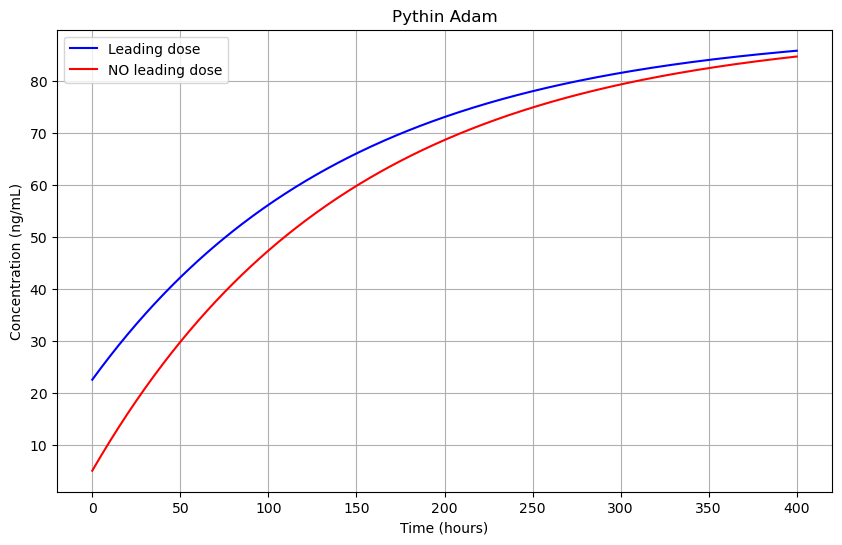

In [34]:
def S(t):
    return 225+(225*np.exp(-0.017*t)+6*t*np.exp(-0.017*t)) - (0.125*t) #THIS BOX AND EVERYTHING THAT FOLLOWS WAS ROUGH WORK
def y(t):
    return 50+(50*np.exp(-0.017*t)+2.083*t*np.exp(-0.017*t)) - (0.125*t)
a = 0
b = 400
n = 400
 
t = np.linspace(a,b,n)
Si = S(t)
yi = y(t)

def compartment(y, t, d1, d2, elimination):
    B1, B2 = y
    dB1dt = d1 + elimination * B1 
    dB2dt = d2 + elimination * B2 
    return [dB1dt, dB2dt]
elimination = -(np.log(2)/100)*np.exp(-np.log(2)/100)
d1 = 6.2
d2 = 6.2
y0 = [225, 50]
protosolution = odeint(compartment, y0, t, args=(d1, d2, elimination))

B1, B2 = protosolution.T

plt.figure(figsize=(10, 6))
plt.plot(t, 5*B1/50, 'b', label='Leading dose')
plt.plot(t, 5*B2/50, 'r', label='NO leading dose')
plt.title('Pythin Adam')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (ng/mL)')
plt.legend()
plt.grid(True)
plt.show()

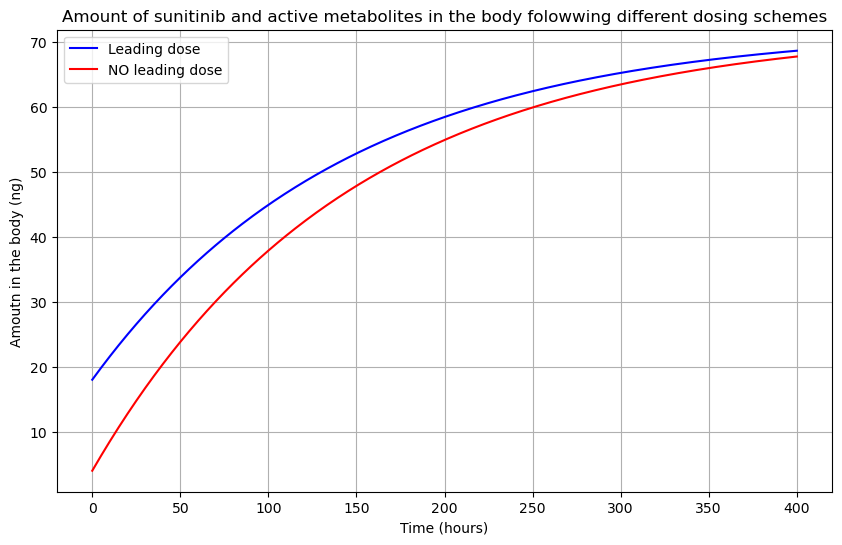

In [28]:
a = 0
b = 400
n = 400
 
t = np.linspace(a,b,n)

def compartment(y, t, d1, d2, elimination):
    B1, B2 = y
    dB1dt = d1 + elimination * B1 
    dB2dt = d2 + elimination * B2 
    return [dB1dt, dB2dt]
elimination = -(np.log(2)/100)*np.exp(-np.log(2)/100)
d1 = 6.2
d2 = 6.2
y0 = [225, 50]
protosolution = odeint(compartment, y0, t, args=(d1, d2, elimination))

B1, B2 = protosolution.T

plt.figure(figsize=(10, 6))
plt.plot(t, B1/(2.5*5), 'b', label='Leading dose')
plt.plot(t, B2/(2.5*5), 'r', label='NO leading dose')
plt.title('Amount of sunitinib and active metabolites in the body folowwing different dosing schemes')
plt.xlabel('Time (hours)')
plt.ylabel('Amoutn in the body (ng)')
plt.legend()
plt.grid(True)
plt.show()

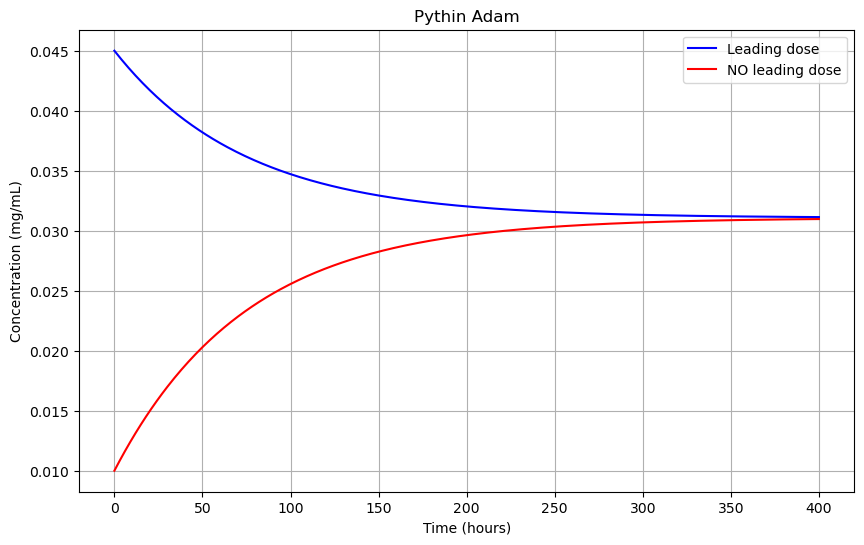

In [42]:
def S(t):
    return 225+(225*np.exp(-0.017*t)+6*t*np.exp(-0.017*t)) - (0.125*t)
def y(t):
    return 50+(50*np.exp(-0.017*t)+2.083*t*np.exp(-0.017*t)) - (0.125*t)
a = 0
b = 400
n = 400
 
t = np.linspace(a,b,n)
Si = S(t)
yi = y(t)

def compartment(y, t, d1, d2, elimination):
    B1, B2 = y
    dB1dt = d1 + elimination * B1 
    dB2dt = d2 + elimination * B2 
    return [dB1dt, dB2dt]
elimination = -(np.log(2)/51)*np.exp(-np.log(2)/51)
d1 = 2.083
d2 = 2.083
y0 = [225, 50]
protosolution = odeint(compartment, y0, t, args=(d1, d2, elimination))

B1, B2 = protosolution.T

plt.figure(figsize=(10, 6))
plt.plot(t, B1/5000, 'b', label='Leading dose')
plt.plot(t, B2/5000, 'r', label='NO leading dose')
plt.title('Pythin Adam')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/mL)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
a = 0
b = 400
n = 400
 
t = np.linspace(a,b,n)
def compartment(y, t, hourly_dose, elimination):
    S = y
    dSdt = hourly_dose + elimination * S 
    return [dSdt]
elimination = -(np.log(2)/51)*np.exp(-np.log(2)/51)
hourly_dose = 2.083
y0 = [225]
protosolution = odeint(compartment, y0, t, args=(hourly_dose, elimination))

B1= protosolution.T

plt.figure(figsize=(10, 6))
plt.plot(t, B1, 'b', label='Leading dose')
plt.title('Pythin Adam')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/mL)')
plt.legend()
plt.grid(True)
plt.show()

RuntimeError: The array return by func must be one-dimensional, but got ndim=2.

In [82]:
a = 0
b = 400
n = 400
 
t = np.linspace(a,b,n)
def compartment(y, t, hourly_dose, elimination, distribution):
    S = y
    dSdt = hourly_dose + elimination * S 
    return [dSdt]
elimination = -(np.log(2)/51)*np.exp(-np.log(2)/51)
hourly_dose = 2.083
distribution = 1
y0 = [225]
protosolution = odeint(compartment, y0, t, args=(hourly_dose, elimination, distribution))

B1= protosolution.T

plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', label='Leading dose')
plt.title('Pythin Adam')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/mL)')
plt.legend()
plt.grid(True)
plt.show()

RuntimeError: The array return by func must be one-dimensional, but got ndim=2.

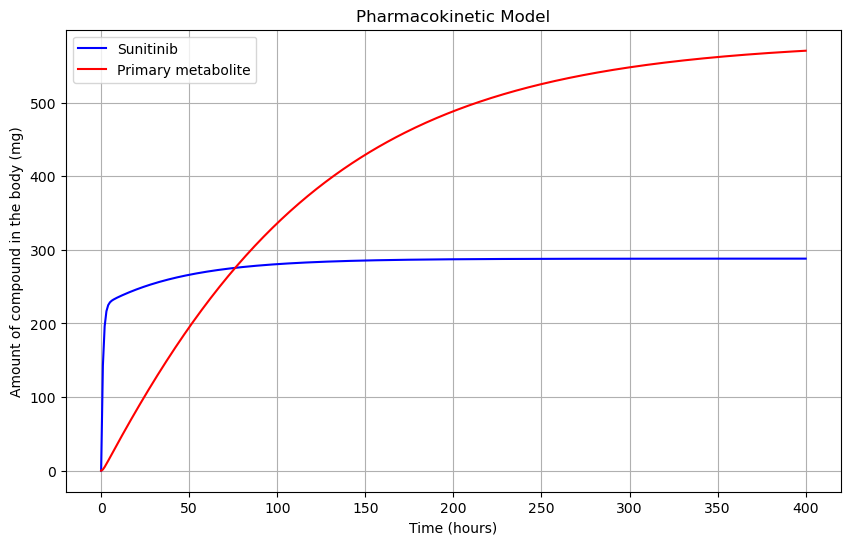

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

a = 0
b = 400
n = 400
 
t = np.linspace(a, b, n)

def compartment(y, t, hourly_dose, clearance_s, clearace_m, absorption, metabolism, distribution_s, distribution_m):
    GI, S, M = y
    dGIdt = hourly_dose - absorption * GI
    dSdt = absorption * GI - clearance_s * S / distribution_s
    dMdt = metabolism * S - clearance_m * M / distribution_m
    
    return [dGIdt, dSdt, dMdt]

clearance_s = 48  #L/hr 
clearance_m =  29.6 #L/hr
hourly_dose = 6.2 #mg/hour
metabolism = 0.02
absorption = 1
distribution_s = 2230
distribution_m = 3000
y0 = [225, 0, 0]

protosolution = odeint(compartment, y0, t, args=(hourly_dose, clearance_s, clearance_m, absorption, metabolism, distribution_s, distribution_m))
GI, S, M = protosolution.T  # Extracting the first column from the solution array

plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', label='Sunitinib')
plt.plot(t, M, 'r', label = 'Primary metabolite')
#plt.plot(t, GI, 'g', label = 'GI tract')
plt.title('Pharmacokinetic Model')
plt.xlabel('Time (hours)')
plt.ylabel('Amount of compound in the body (mg)')
plt.legend()
plt.grid(True)
plt.show()

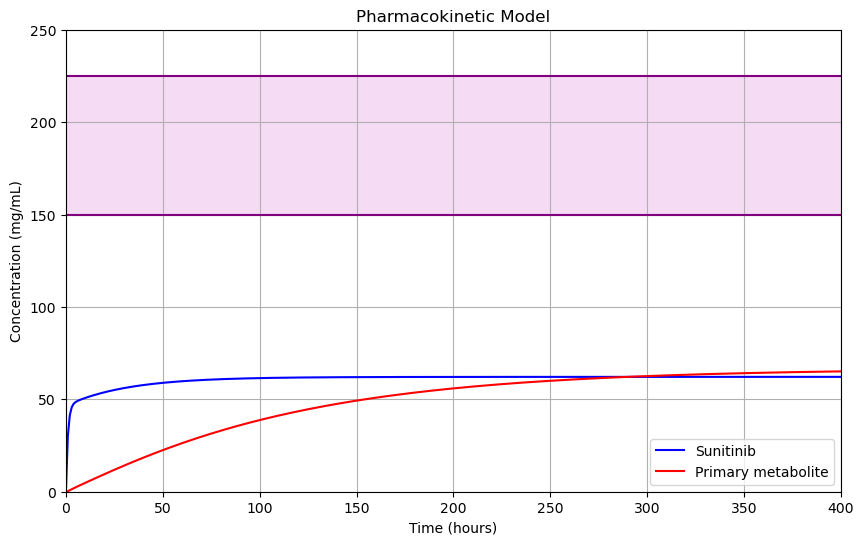

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

a = 0
b = 667
n = 667
 
t = np.linspace(a, b, n)

def compartment(y, t, hourly_dose, clearance_s, clearance_m, absorption_s, absorption_m, metabolism, distribution_s, distribution_m):
    GI_s, GI_m, S, M = y
    dGIsdt = hourly_dose - absorption_s * GI_s - metabolism * GI_s - (1-absorption_s) * GI_s
    dGImdt = metabolism * GI_s - absorption_m * GI_m - (1-absorption_m) * GI_m
    dSdt = absorption_s * GI_s - metabolism * S - clearance_s * S / distribution_s
    dMdt = absorption * GI_m + metabolism * S - clearance_m * M / distribution_m
    
    return [dGIsdt, dGImdt, dSdt, dMdt]

clearance_s = 48  # L/hr 
clearance_m = 29.6  # L/hr
hourly_dose = 2.083  # mg/hour
metabolism = 0.01
absorption_s = 0.95
absorption_m = 0.3
distribution_s = 2230
distribution_m = 3080
y0 = [50, 0, 0, 0]

protosolution = odeint(compartment, y0, t, args=(hourly_dose, clearance_s, clearance_m, absorption_s, absorption_m, metabolism, distribution_s, distribution_m))
GI_s, GI_m, S, M = protosolution.T  # Extracting the first column from the solution array


plt.figure(figsize=(10, 6))
plt.axhline(y = 225, color = 'purple', linestyle = '-')
plt.axhline(y = 150, color = 'purple', linestyle = '-')
plt.plot(t, S, 'b', label='Sunitinib')
plt.plot(t, M, 'r', label='Primary metabolite')
#plt.plot(t, GI_s, 'g', label='GI s')
#plt.plot(t, GI_m, 'p', label='GI metabolite')
plt.title('Pharmacokinetic Model')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (mg/mL)')
ax = plt.gca()
ax.set_xlim([0,400])
ax.set_ylim([0, 250])
plt.fill_between(t, 150,225, color = 'orchid', alpha = 0.25)
plt.legend()
plt.grid(True)
plt.show()
